1. 아래 셀 실행
2. 런타임 -> 세션 다시시작
3. 셀 다시한번 실행
-------------------
4. 코랩에 파일 데이터 파일 업로드
5. 파일 경로 수정
6. 컬럼명 수정
-------------------
7. 제외할 단어 불용어사전에 추가

In [ ]:
# -----------------------------
# STEP 1. Java 및 KoNLPy 설치
# -----------------------------
!apt-get update
!apt-get install -y openjdk-11-jdk
!pip install konlpy

# -----------------------------
# STEP 2. 한글 폰트 설치
# -----------------------------
!apt-get -qq install fonts-nanum

# -----------------------------
# STEP 3. 환경변수 및 폰트 설정
# -----------------------------
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# JAVA 환경 설정
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

# 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
plt.rc('font', family=fm.FontProperties(fname=font_path).get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

#### 데이터 준비

In [ ]:
import pandas as pd

In [ ]:
# ------------------------------
#   파일 경로
# ------------------------------
data_file = '/content/2025-05-19_1747640910.csv'

# ------------------------------
#   불러올 컬럼명
# ------------------------------
col_name = 'subject'

# ------------------------------
#   데이터 불러오기
# ------------------------------
data = pd.read_csv(data_file).loc[:,col_name].dropna()

# ------------------------------
#   내용 컬럼을 하나의 문장으로 합치기
# ------------------------------
text = ' '.join(data)
text



'출시 앞둔 \'K슈드\'…변동성 장세 속 효자손 될까 코로나 재확산에 ‘치사율 75%’ 니파까지…진단키트주 급등 트럼프발 관세전쟁 투자 전략은…“국방 그리고 빅테크” 무디스, 108년 만에 美 신용등급 강등…미국채 펀드 괜찮을까? "월급쟁이의 꿈이네"…100억대 주식부자 8명 있는 \'이 회사\' "2분기 업황 우려"에 주저앉은 반도체株…SK하닉·삼전 동반 약세[핫종목] 대기업·PEF 차세대 ESS 투자 러시 이재명 해상풍력·태양광 확대 공약에…신재생에너지주 강세 美독주 끝나자…이머징마켓 ‘쑥쑥’ 반등 \'ETF 업계 1위\' 삼성운용, 낮은 해외 비중 \'골머리\'…미래에셋운용에 자리 내주나 거버넌스포럼 “LS·한진칼의 주주이익 침해 결정 번복해야” 비트코인 100일만에 1.5억원...이후 하락세 [매일코인] 씨피시스템, 자사주 전량 소각…"주주환원 정책 지속" 트럼프 시대, 美 IPO 대신 재부상한 스팩 미중 무역전쟁 피해 동남아 진출하는 中기업…싱가포르 상장 \'열풍\' \'2차전지 1세대\' 엠플러스, “1조 CAPA로 글로벌 시장 공략” 상장사 1Q 실적 부익부 빈익빈···코스닥 위축 뚜렷 거버넌스포럼 "한진칼·LS, 자사주 활용한 지배권 굳히기 잘못" "삼성전자·하이닉스·금융지주 잡아라"…내년 외부감사 큰장 선다 비트코인 피자데이…업비트·빗썸·코인원 이벤트(종합) 금감원 노조위원장, 초유의 \'탄핵 사태\' 휘말렸다 [돈앤톡] 美신용 강등에 환율 하락세 ‘제동’…‘장기 변수’ 될까 현대운용 FKI타워에서 나간다…매각 지연에 증권사 돈 묶이나 텔코웨어, 공개매수 후 자진 상폐 추진 소식에…상한가 엠플러스 "매출 1조원 기대… 청주 공장 생산량  3배 늘린다"[르포] 솔루엠, 배임 논란에 자사주 대주주 처분 철회 미 재무, 무디스에 반박..장기 금리 더 올랐다 [월가 딥다이브] 코오롱생명과학, 피부암 항암제 전임상 결과 ASGCT 포스터발표 상지건설, 내일 유증 참여자 매도 가능해져… 현재 28% 평가익 개미 열심히 담지만 역부족…美 신용등급 강등에 

#### 문자열 정제
* 한글만 남기기

In [ ]:
import re
clean_text = re.sub(r'[^가-힇\s]', ' ', text)
clean_text

'출시 앞둔   슈드  변동성 장세 속 효자손 될까 코로나 재확산에  치사율      니파까지 진단키트주 급등 트럼프발 관세전쟁 투자 전략은  국방 그리고 빅테크  무디스     년 만에   신용등급 강등 미국채 펀드 괜찮을까   월급쟁이의 꿈이네     억대 주식부자  명 있는  이 회사    분기 업황 우려 에 주저앉은 반도체    하닉 삼전 동반 약세 핫종목  대기업     차세대     투자 러시 이재명 해상풍력 태양광 확대 공약에 신재생에너지주 강세  독주 끝나자 이머징마켓  쑥쑥  반등      업계  위  삼성운용  낮은 해외 비중  골머리  미래에셋운용에 자리 내주나 거버넌스포럼     한진칼의 주주이익 침해 결정 번복해야  비트코인    일만에    억원   이후 하락세  매일코인  씨피시스템  자사주 전량 소각  주주환원 정책 지속  트럼프 시대        대신 재부상한 스팩 미중 무역전쟁 피해 동남아 진출하는  기업 싱가포르 상장  열풍    차전지  세대  엠플러스    조     로 글로벌 시장 공략  상장사    실적 부익부 빈익빈   코스닥 위축 뚜렷 거버넌스포럼  한진칼     자사주 활용한 지배권 굳 기 잘못   삼성전자 하이닉스 금융지주 잡아라  내년 외부감사 큰장 선다 비트코인 피자데이 업비트 빗썸 코인원 이벤트 종합  금감원 노조위원장  초유의  탄핵 사태  휘말렸다  돈앤톡   신용 강등에 환율 하락세  제동   장기 변수  될까 현대운용    타워에서 나간다 매각 지연에 증권사 돈 묶이나 텔코웨어  공개매수 후 자진 상폐 추진 소식에 상한가 엠플러스  매출  조원 기대  청주 공장 생산량   배 늘린다  르포  솔루엠  배임 논란에 자사주 대주주 처분 철회 미 재무  무디스에 반박  장기 금리 더 올랐다  월가 딥다이브  코오롱생명과학  피부암 항암제 전임상 결과       포스터발표 상지건설  내일 유증 참여자 매도 가능해져  현재     평가익 개미 열심  담지만 역부족   신용등급 강등에 코스피      붕괴  분

* 블용어 사전

In [ ]:
# -----------------------
# 외부 불용어 사전
# -----------------------

import requests

url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ko/refs/heads/master/stopwords-ko.txt"
response = requests.get(url)

# 줄 단위로 나누고, 공백 제거 후 리스트 생성
external_stopwords = [line.strip() for line in response.text.splitlines() if line.strip()]

# -----------------------
# 커스터마이즈 불용어 사전
# -----------------------
custom_stopwords = ['기사','목표', '투자']


# -----------------------
# 최종 불용어 사전
#   외부 불용어 사전, 커스터마이즈 불용어사전 합치고 중복 제거
# -----------------------
stopwords = set(external_stopwords + custom_stopwords)

#### 명사 추출 및 불용어 제거
* KoNLPy라이브러리의 형태소분석기 사용
* KoNLPy 사용 시 자바(JDK)가 필요할 수 있으니, 환경에 따라 JDK 설치 및 JAVA_HOME 환경변수 설정이 필요할 수도 있습니다​

In [ ]:
# ----------------------------
# 형태소 분석기로 명사만 추출
# ----------------------------

from konlpy.tag import Okt

okt = Okt()
nouns = okt.nouns(clean_text)

# ----------------------------
# 한글자인 명사와 불용어 제거
# ----------------------------

filtered_nouns = [
    n for n in nouns
    if len(n) > 1 and n not in stopwords
]

#### 단어 빈도 계산
* 리스트에서 각 항목이 몇 번 나오는지 카운트

In [ ]:
from collections import Counter

counter = Counter(filtered_nouns)  # 명사 리스트를 Counter 객체로 변환
print(counter.most_common(10))

[('코스피', 15), ('주식', 14), ('증권', 14), ('종목', 13), ('실적', 13), ('기대', 13), ('신용등급', 12), ('강등', 11), ('해외', 11), ('주주', 11)]


#### 상위명사 추출

In [ ]:
top50 = dict(counter.most_common(50))  # 가장 많이 등장한 50개 단어만 추출하여 딕셔너리 생성

#### 한글 폰트 설정 및 워드클라우드 시각화

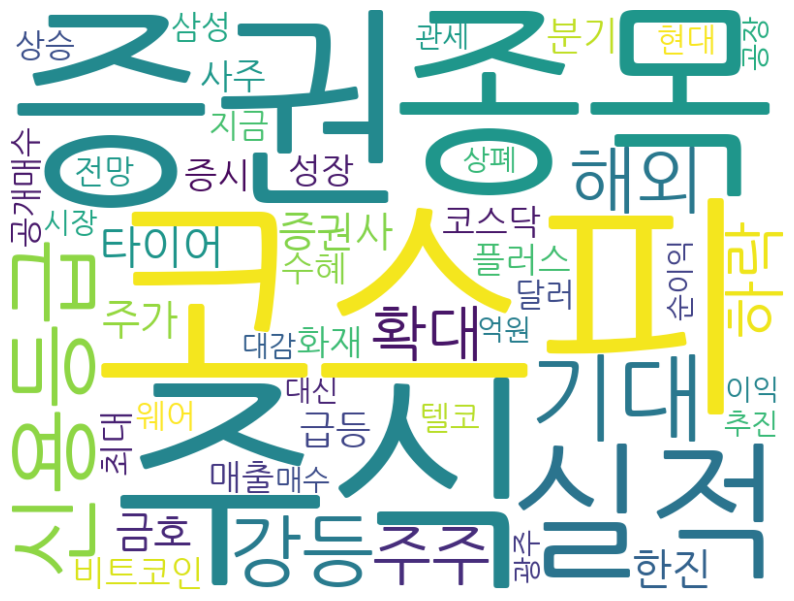

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = font_path  # 한글 폰트 경로 (환경에 맞게 변경)
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)

# 앞서 계산한 단어 빈도 사용하여 워드클라우드 생성
cloud = wc.generate_from_frequencies(top50)  # 또는 wc.generate_from_frequencies(counter) 전체 단어 사용

# 워드클라우드 이미지 시각화
plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()
